In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


In [3]:
def plot_images(images: list, titles: list, columns: int, font_size: int, allow_axes: bool) -> np.ndarray:

    """
    generates a plot of images for comparison, dynamic calculation of arrangement

    Parameters: 
        images (list): list of variables referencing an image
        titles (list): list of strings describing the image
        columns: (integer): number of columns for plot
        font_size (integer): fontsize of subplot titles
        allow_axes (boolean): if true, adds axes by default. else, removes axes

    Returns:
        matrix of pixel values for each image (np.array)
        a plot (image)
    """
    images_len = len(images)
    rows = images_len // columns

    fig, axes = plt.subplots(rows, columns, figsize = (18, 6 * rows))
    axes = axes.flatten()
    
    for i in range(images_len):
        axes[i].imshow(images[i])
        axes[i].set_title(titles[i], fontsize=font_size)
        # print(np.array(images[i]))
        if allow_axes == True:
            pass
        else:
            axes[i].axis('off')
    plt.show()


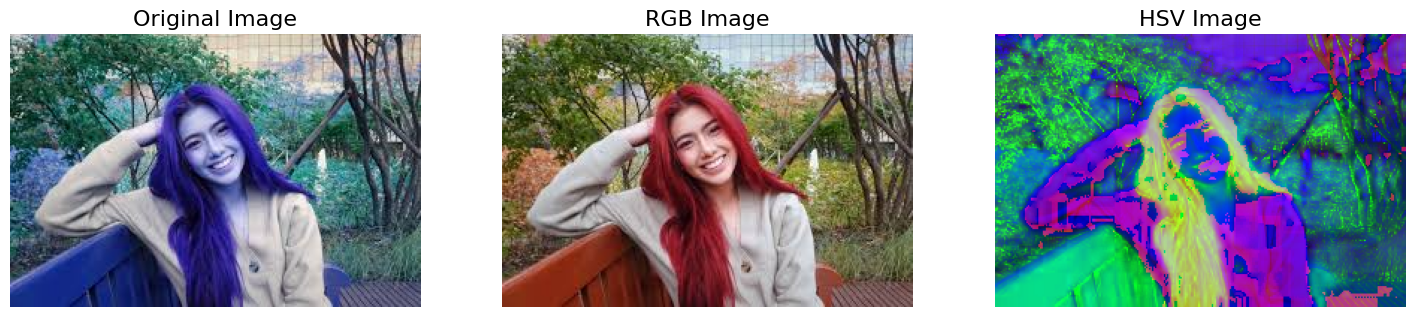

In [4]:
image = cv.imread('mikha.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

image_variables = [image, image_rgb, image_hsv]
image_names = ['Original Image', 'RGB Image', 'HSV Image']
plot_images(image_variables, image_names, 3, 16, False)

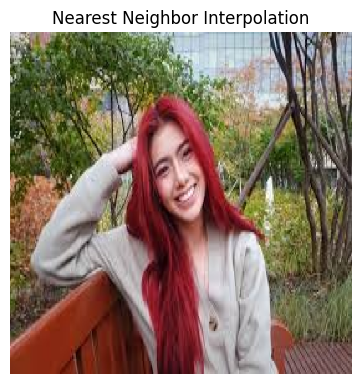

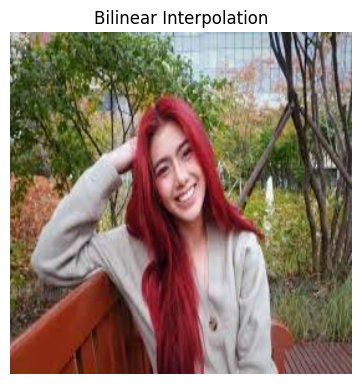

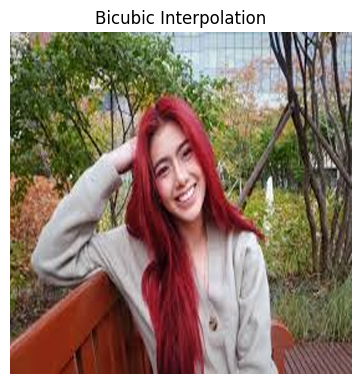

In [5]:
methods = {
"Nearest Neighbor": cv.INTER_NEAREST,
"Bilinear": cv.INTER_LINEAR,
"Bicubic": cv.INTER_CUBIC
}

new_size = (8000, 8000)

for idx, (method_name, method) in enumerate(methods.items(), start=1):
    plt.figure(figsize=(15, 5))
    resized_image = cv.resize(image, new_size, interpolation=method)
    # Plot each resized image
    plt.subplot(1, 3, idx)
    plt.imshow(cv.cvtColor(resized_image, cv.COLOR_BGR2RGB))
    plt.title(f"{method_name} Interpolation")
    plt.axis('off')
    plt.show()

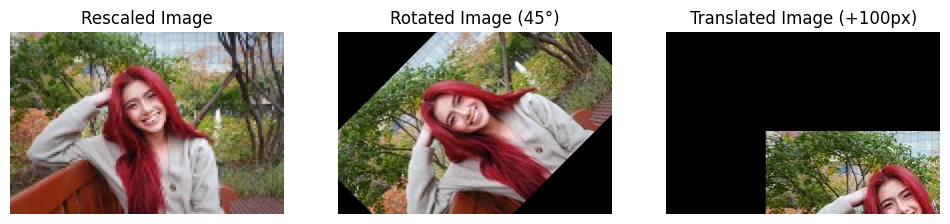

In [6]:
# Scaling: Apply scaling transformation (50% size)
scale_percent = 50 # Scale down by 50%
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
rescaled_image = cv.resize(image, dim)
# Rotation: Rotate the image by 45 degrees
center = (image.shape[1] // 2, image.shape[0] // 2)
rotation_matrix = cv.getRotationMatrix2D(center, 45, 1.0) # Rotate by 45 degrees
rotated_image = cv.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
# Translation: Move the image 100 pixels in both x and y direction
translation_matrix = np.float32([[1, 0, 100], [0, 1, 100]]) # Translate by (100, 100)
translated_image = cv.warpAffine(image, translation_matrix, (image.shape[1],
image.shape[0]))
# Plot the transformations
plt.figure(figsize=(12, 4))
# Display Rescaled image
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(rescaled_image, cv.COLOR_BGR2RGB))
plt.title('Rescaled Image')
plt.axis('off')
# Display Rotated image
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB))
plt.title('Rotated Image (45°)')
plt.axis('off')
# Display Translated image
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(translated_image, cv.COLOR_BGR2RGB))
plt.title('Translated Image (+100px)')
plt.axis('off')
plt.show()

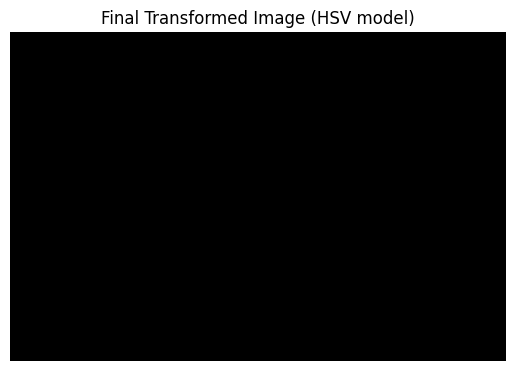

In [12]:
# Convert the image to HSV
image_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
# Resize with Bicubic interpolation
scaled_hsv = cv.resize(image_hsv, dim, interpolation=cv.INTER_CUBIC)
# Rotate the scaled image
rotated_hsv = cv.warpAffine(scaled_hsv, rotation_matrix, (scaled_hsv.shape[1],
scaled_hsv.shape[0]))
# Translate the rotated image
translated_hsv = cv.warpAffine(rotated_hsv, translation_matrix, (rotated_hsv.shape[1],
rotated_hsv.shape[0]))
# Plot the final image
plt.imshow(cv.cvtColor(translated_hsv, cv.COLOR_HSV2RGB))
plt.title('Final Transformed Image (HSV model)')
plt.axis('off')
plt.show()